# Time Series

### About Dataset:
**Bitcoin trend data.**

**Aim: To Analyze trend using Time Series and forecast data**

In [1]:
import pandas as pd
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [8]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [3]:
df= pd.read_csv("bitcoin_price_Training_-_Training.csv")
df.head(10)

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,"Jul 28, 2017",2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,"Jul 27, 2017",2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
5,"Jul 26, 2017",2577.77,2610.76,2450.80,2529.45,"937,404,000","42,455,000,000"
6,"Jul 25, 2017",2757.50,2768.08,2480.96,2576.48,"1,460,090,000","45,410,100,000"
7,"Jul 24, 2017",2732.70,2777.26,2699.19,2754.86,"866,474,000","44,995,600,000"
8,"Jul 23, 2017",2808.10,2832.18,2653.94,2730.40,"1,072,840,000","46,231,100,000"
9,"Jul 22, 2017",2668.63,2862.42,2657.71,2810.12,"1,177,130,000","43,929,600,000"


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 7 columns):
Date          1556 non-null object
Open          1556 non-null float64
High          1556 non-null float64
Low           1556 non-null float64
Close         1556 non-null float64
Volume        1556 non-null object
Market Cap    1556 non-null object
dtypes: float64(4), object(3)
memory usage: 85.2+ KB


In [13]:
#need to change the format for date column as it is in object form
df['Date'] = pd.to_datetime(df['Date'],dayfirst= True,format= "%d-%m-%Y")

In [14]:
df.shape

(1556, 7)

In [16]:
df.info() # no missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 7 columns):
Date          1556 non-null datetime64[ns]
Open          1556 non-null float64
High          1556 non-null float64
Low           1556 non-null float64
Close         1556 non-null float64
Volume        1556 non-null object
Market Cap    1556 non-null object
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 85.2+ KB


In [17]:
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"


In [18]:
df = df.set_index(df.Date)

In [19]:
del df["Date"]
df.head()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"


# Converting dataframe into time series

In [20]:
type(df)

pandas.core.frame.DataFrame

In [24]:
#we will convert dataframe to time series since we have multiple factor we will do it first column with "open" column

samp = df["Open"]
type(samp)

pandas.core.series.Series

In [25]:
samp.head()

Date
2017-07-31    2763.24
2017-07-30    2724.39
2017-07-29    2807.02
2017-07-28    2679.73
2017-07-27    2538.71
Name: Open, dtype: float64

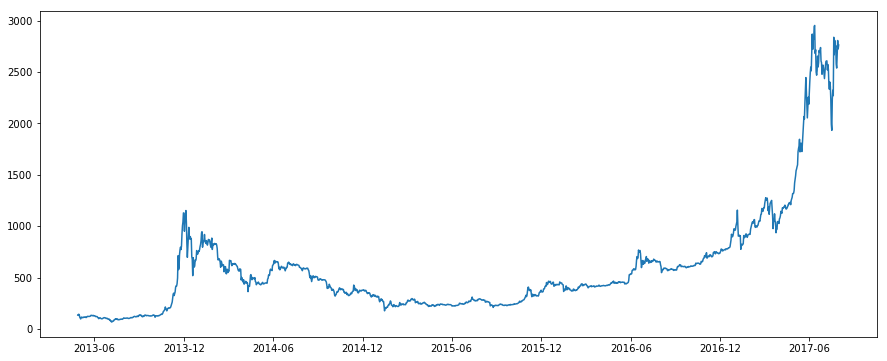

In [26]:
plt.plot(samp)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  from ipykernel import kernelapp as app


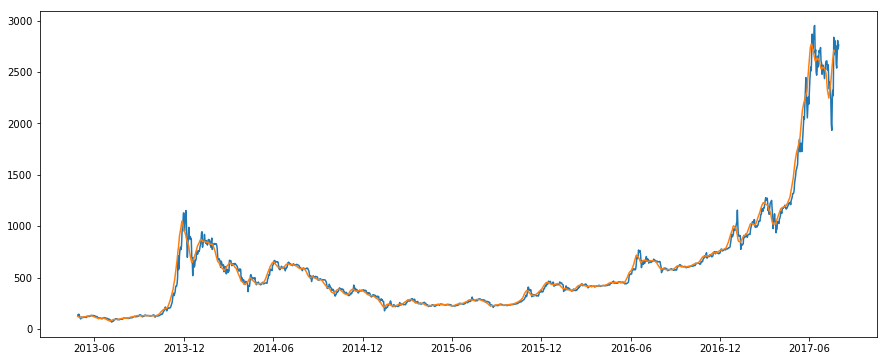

In [27]:
#plotting moving average to chexk if we have stationarity in the dataset that is if the mean , varinace are stable or not
mvg_avg = pd.rolling_mean(samp,10)
plt.plot(samp)
plt.plot(mvg_avg)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(com=10,min_periods=0,adjust=True,ignore_na=False).mean()
  from ipykernel import kernelapp as app


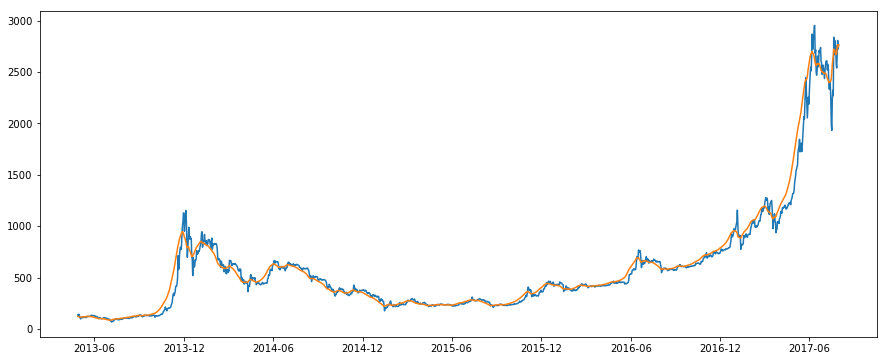

In [28]:
#plotting eponential moving avg it will focus more on latest data  points
expo_avg = pd.ewma(resamp,10)
plt.plot(resamp)
plt.plot(expo_avg)

# resampling of data

instead of taking each day we will take weeks for removing the risk of too much **Variation**

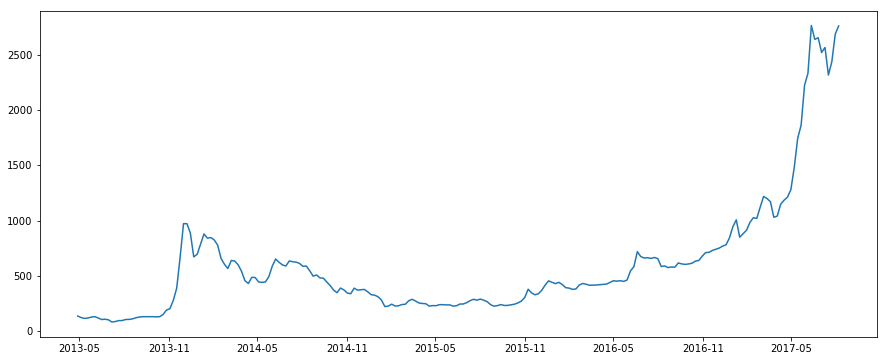

In [29]:
resamp_series = samp.resample("W").mean()
plt.plot(resamp_series)

### defining a function for checking the stationarity of the time series

In [32]:
def test_stationarity(ts):
    
    #method 1: rolling mean and std
    rolmean = ts.rolling(window = 52,center= False).mean()
    rolstd = ts.rolling(window=52,center = False).std()
    #plotting these:
    plt.plot(ts,color = "Blue",label = "original")
    plt.plot(rolmean,color = "green",label = "rolling mean")
    plt.plot(rolstd,color = "red",label = "rolling std")
    plt.legend()
    plt.show(block = False)
    
    #method 2: Dickey fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(ts,autolag='AIC')
    print(dftest)
    dfoutput = pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput["Critical_values : %s"%key] = value
    print(dfoutput)
        

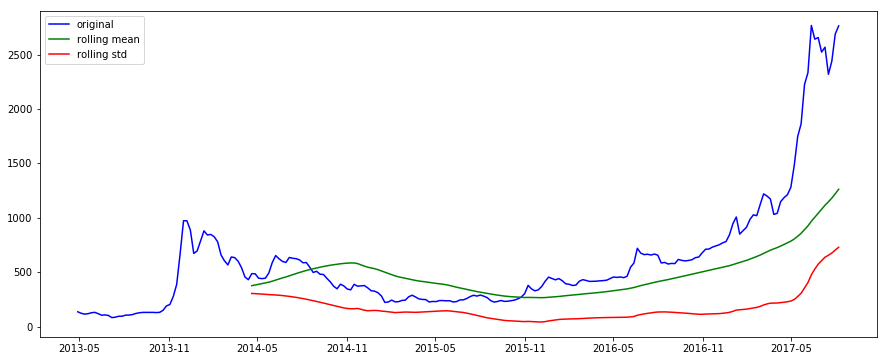

Results of Dickey-Fuller Test:
(1.206705098662417, 0.99603188321058456, 4, 219, {'1%': -3.4605673726102988, '5%': -2.8748298090333861, '10%': -2.5738532259544211}, 2341.902087225852)
Test Statistic                   1.206705
p-value                          0.996032
#Lags Used                       4.000000
Number of Observations Used    219.000000
Critical_values : 1%            -3.460567
Critical_values : 5%            -2.874830
Critical_values : 10%           -2.573853
dtype: float64


In [33]:
test_stationarity(resamp_series)  # test

**Summary : after resampling data **
1 . still there is less smoothness in the line so data is not stationary.
2. Dickey fuller test (ad fuller test): it test the null hypothesis H0:data is not staionary whereas H1: data is stationary
3. if p-value < 0.05 we will reject the null hypothesis.
4. Here p value is greater so we will not reject null hypothesis and hence the data is still not stationary.

## Applying some other different methods for making the time series stationary

1> different data transformation eg, logarithm <br>
2> decomposing the trends , seasonality and cylce <br>
3> applying differencing with log transformed data and Removed trend and seasonality <br>

## Method 1: data transformation eg, logarithm

In [34]:
resamp_series_log = np.log(resamp_series)  # the values will become logrithmic values

In [35]:
resamp_series_log.head(10)

Date
2013-04-28    4.907495
2013-05-05    4.800584
2013-05-12    4.735158
2013-05-19    4.767459
2013-05-26    4.836962
2013-06-02    4.869105
2013-06-09    4.768746
2013-06-16    4.644830
2013-06-23    4.669003
2013-06-30    4.617550
Freq: W-SUN, Name: Open, dtype: float64

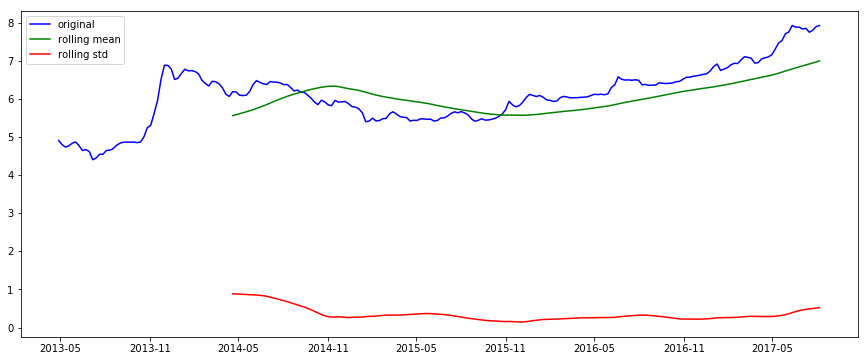

Results of Dickey-Fuller Test:
(-1.0688674013480721, 0.72732624362738196, 1, 222, {'1%': -3.4601541637510409, '5%': -2.874648939216792, '10%': -2.5737567259151044}, -454.88161191411461)
Test Statistic                  -1.068867
p-value                          0.727326
#Lags Used                       1.000000
Number of Observations Used    222.000000
Critical_values : 1%            -3.460154
Critical_values : 5%            -2.874649
Critical_values : 10%           -2.573757
dtype: float64


In [36]:
test_stationarity(resamp_series_log) #by seeeing the below graph it is concluded that still there is lot of variance in the data

**summary: after log transformation**
1. still the data has lot of variance
2. p-value is still not less than 0.05

## Method 2: Decomposing of the trends
#### importing libraries for decompostion

In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose

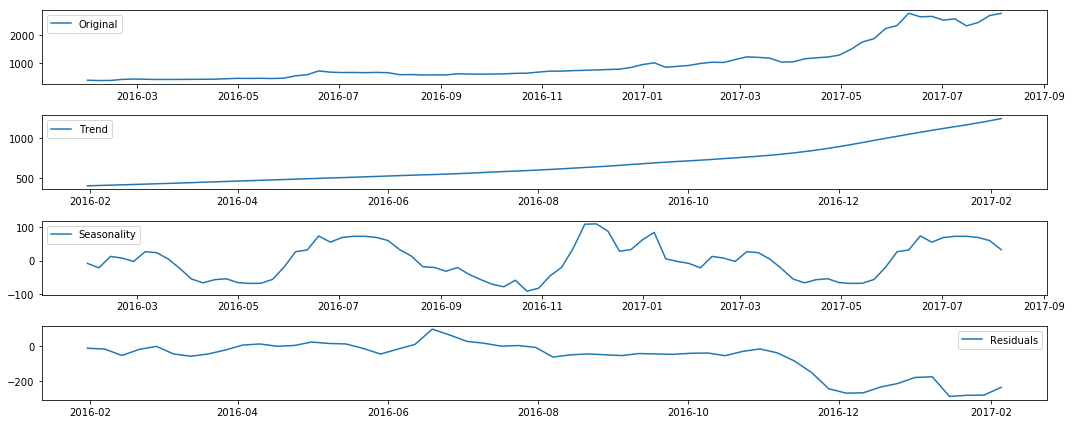

In [41]:
decompose1 = seasonal_decompose(resamp_series,model="additive")

trend = decompose1.trend
seasonality = decompose1.seasonal
irregular = decompose1.resid

plt.subplot(411)
plt.plot(resamp_series[-80:], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend[-80:], label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonality[-80:],label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(irregular[-80:], label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

# Method 3: applying differencing with log transformed data and Removed trend and seasonality

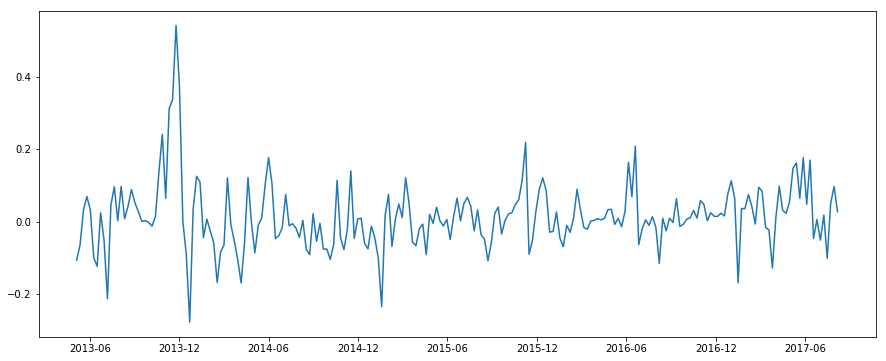

In [46]:
diff_log_resamp_ts = resamp_series_log - resamp_series_log.shift() #(Subtracting new value with penultimate value 
#this is first order of differencing)
diff_log_resamp_ts.dropna(inplace = True)
plt.plot(diff_log_resamp_ts)

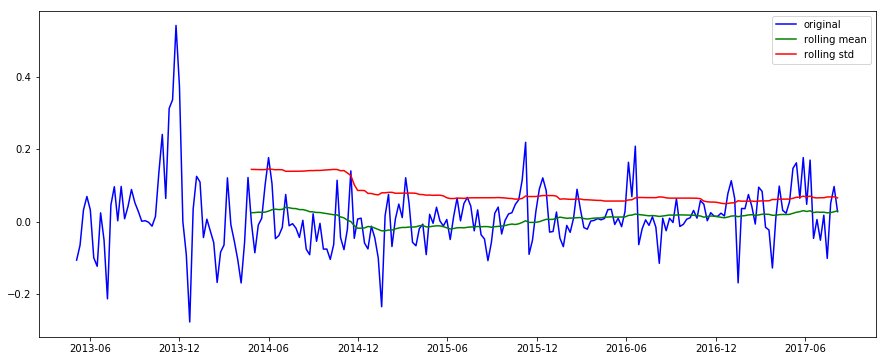

Results of Dickey-Fuller Test:
(-8.9893734331555901, 6.9588116670602385e-15, 0, 222, {'1%': -3.4601541637510409, '5%': -2.874648939216792, '10%': -2.5737567259151044}, -451.77531456474526)
Test Statistic                -8.989373e+00
p-value                        6.958812e-15
#Lags Used                     0.000000e+00
Number of Observations Used    2.220000e+02
Critical_values : 1%          -3.460154e+00
Critical_values : 5%          -2.874649e+00
Critical_values : 10%         -2.573757e+00
dtype: float64


In [44]:
test_stationarity(diff_log_resamp_ts)

## Conclusion:
 we see from above values that p value is almost zero and test static value is less that the critical value of 1% . <br>
   ** now we can use "diff_log_resamp_series" time series for modelling our data.**

## Modelling with ARIMA MODEL

1> we need to find P, D, Q values -- for calculating these values we will use **ACF and PACF** values. <br>
2> once we got the values we will use them for ARIMA MODEL.

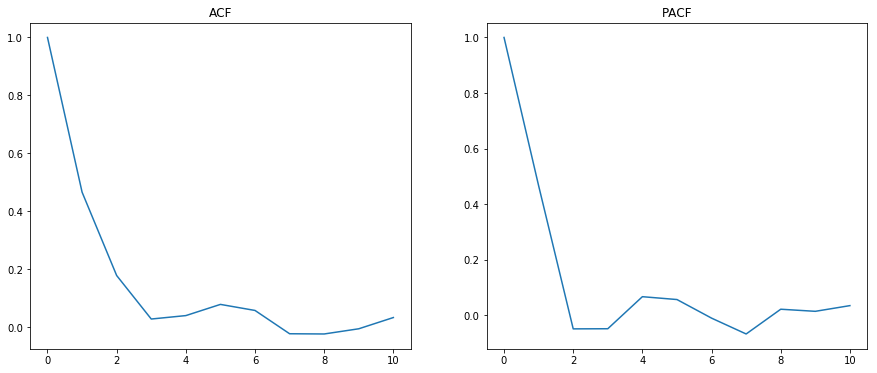

In [45]:
#acf for Q and pacf for p
acf1 = acf(diff_log_resamp_ts,nlags = 10)
pacf1 = pacf(diff_log_resamp_ts,nlags= 10, method="ols")
plt.subplot(121)
plt.plot(acf1)
plt.title("ACF")
plt.subplot(122)
plt.plot(pacf1,label = "pacf")
plt.title("PACF")

#NOTE:  n_lags means how many significant correlation coefficients you get to find order of AR & MA model. 
#For AR model we use Pacf & for MA model we use Acf. n_lags denotes order of AR & MA model.

so we can see clearly that pacf that value drop to zero for first time at "2" and 
acf value drop to zero  for first time at "1"  <br>
**so p = 2, q = 1, d = 1 ** <br>
##### D we have performed earlier with seasonal decomposition

In [47]:
from sklearn.metrics import mean_squared_error

# ARIMA Model

In [52]:
model1 = ARIMA(endog=resamp_series_log,order = (2,1,1)) # model impacted by two previoes time period
result = model1.fit(disp = -1)

RMSE:  0.0810846070509


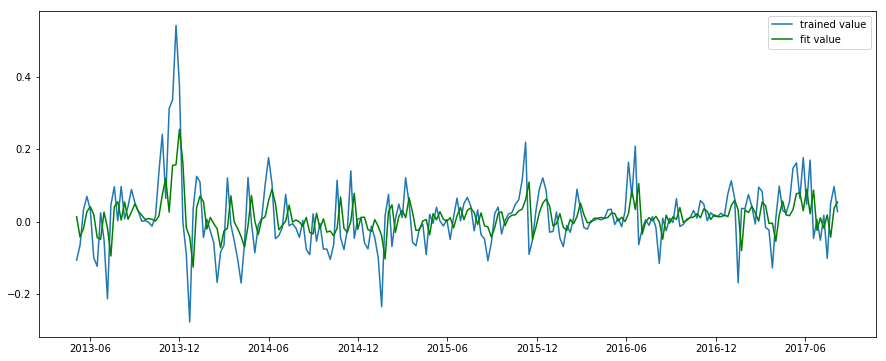

In [50]:
plt.plot(diff_log_resamp_ts, label = "trained value")
plt.plot(result.fittedvalues,color = "green", label = "fit value")
plt.legend()
rmse = np.sqrt(mean_squared_error(result.fittedvalues,diff_log_resamp_ts))
print("RMSE: ", rmse)
#r = sum((result.fittedvalues-diff_log_resamp_ts)**2)
#print(r)

# MA MODEL

RMSE:  0.0826946286957


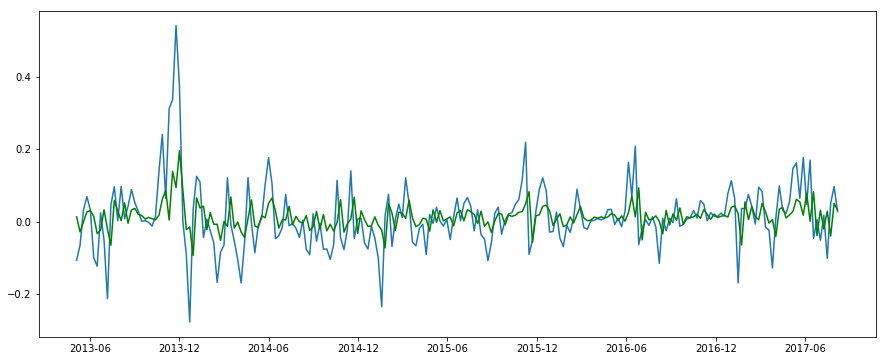

In [53]:
model2 = ARIMA(endog=resamp_series_log,order = (0,1,1))
result2 = model2.fit(disp = -1)
plt.plot(diff_log_resamp_ts)
plt.plot(result2.fittedvalues,color = "green")
rmse = np.sqrt(mean_squared_error(result2.fittedvalues,diff_log_resamp_ts))
print("RMSE: ", rmse)

RMSE:  0.0811069982527


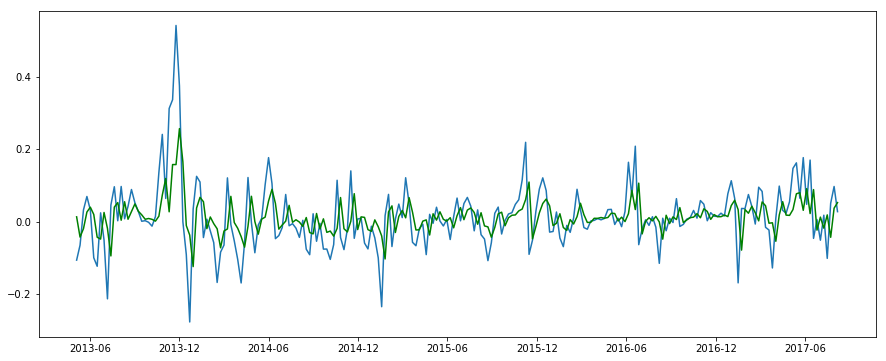

In [57]:
#AR MODEL
model3 = ARIMA(endog=resamp_series_log,order = (2,1,0))
result3 = model3.fit(disp = -1)
plt.plot(diff_log_resamp_ts)
plt.plot(result3.fittedvalues,color = "green")
rmse = np.sqrt(mean_squared_error(result3.fittedvalues,diff_log_resamp_ts))
print("RMSE: ", rmse)
#r = sum((result.fittedvalues-diff_log_resamp_ts)**2)
#print(r)

### Conclusion:
1. since the dataset values are continous we used "RMSE" as the evaluation metric of all model.
2. the difference in the RMSE values of all the model is very less but still if we have to choose then ARIMA model performed well than other two.
3. Most Importantly we can use grid search method to get the best performance values of p,d,q. then we can see some more good models

### Now we will predict the values or say forecast the value for the "<span style="color:red">Opening trend of Bitcoin in upcomping weeks</span> "

In [58]:
pred_full_arima = pd.Series(result.fittedvalues,copy = True)
#pred_full_arima = pred_full_arima.sort()
print(pred_full_arima.tail())


Date
2017-07-09   -0.018147
2017-07-16    0.018540
2017-07-23   -0.043028
2017-07-30    0.037184
2017-08-06    0.053946
Freq: W-SUN, dtype: float64


In [59]:
result.forecast(2)

(array([ 7.94029446,  7.95336308]),
 array([ 0.08099627,  0.14548171]),
 array([[ 7.78154468,  8.09904423],
        [ 7.66822416,  8.238502  ]]))

**the above values are obtained from only one model which performed better that is ARIMA Model.**